In [59]:
!pip install xgboost

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile

!pip install plotly
!pip install jupyterthemes
import plotly.express as px
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [61]:
cancer_df = pd.read_csv('/content/cervical_cancer dataset.csv')

In [62]:
cancer_df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
2,34,1,?,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37,37,1,3,0,...,?,?,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0,0,1,15,0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3,18,0,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
854,32,2,19,1,0,0,0,1,8,0,...,?,?,0,0,0,0,0,0,0,0
855,25,2,17,0,0,0,0,1,0.08,0,...,?,?,0,0,0,0,0,0,1,0
856,33,2,24,2,0,0,0,1,0.08,0,...,?,?,0,0,0,0,0,0,0,0


In [63]:
cancer_df.tail(20)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
838,35,3,18,3,0,0,0,1,5,0,...,?,?,0,0,0,0,0,0,0,0
839,31,3,19,1,0,0,0,1,0.08,1,...,?,?,1,0,0,1,0,0,0,0
840,24,2,16,3,0,0,0,1,5,0,...,?,?,0,0,0,0,0,0,0,0
841,23,2,15,0,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
842,36,3,16,3,1,6,0.3,1,2,0,...,?,?,0,0,0,0,0,0,0,0
843,30,3,14,3,0,0,0,1,2,0,...,?,?,0,0,0,0,0,0,0,0
844,26,8,15,1,1,9,1.35,1,5,1,...,?,?,0,0,0,0,0,0,0,0
845,19,2,15,2,0,0,0,1,0.75,0,...,?,?,0,0,0,0,0,0,0,0
846,35,2,17,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
847,30,3,22,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0


In [64]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [65]:
cancer_df.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
cancer_df = cancer_df.replace('?', np.nan)
cancer_df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0,0,0,0,0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1,NaN,1,0,0,0,0,0,0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37,37,1,3,0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0,0,1,15,0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [67]:
cancer_df.isnull()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
854,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
855,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
856,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False


<Axes: >

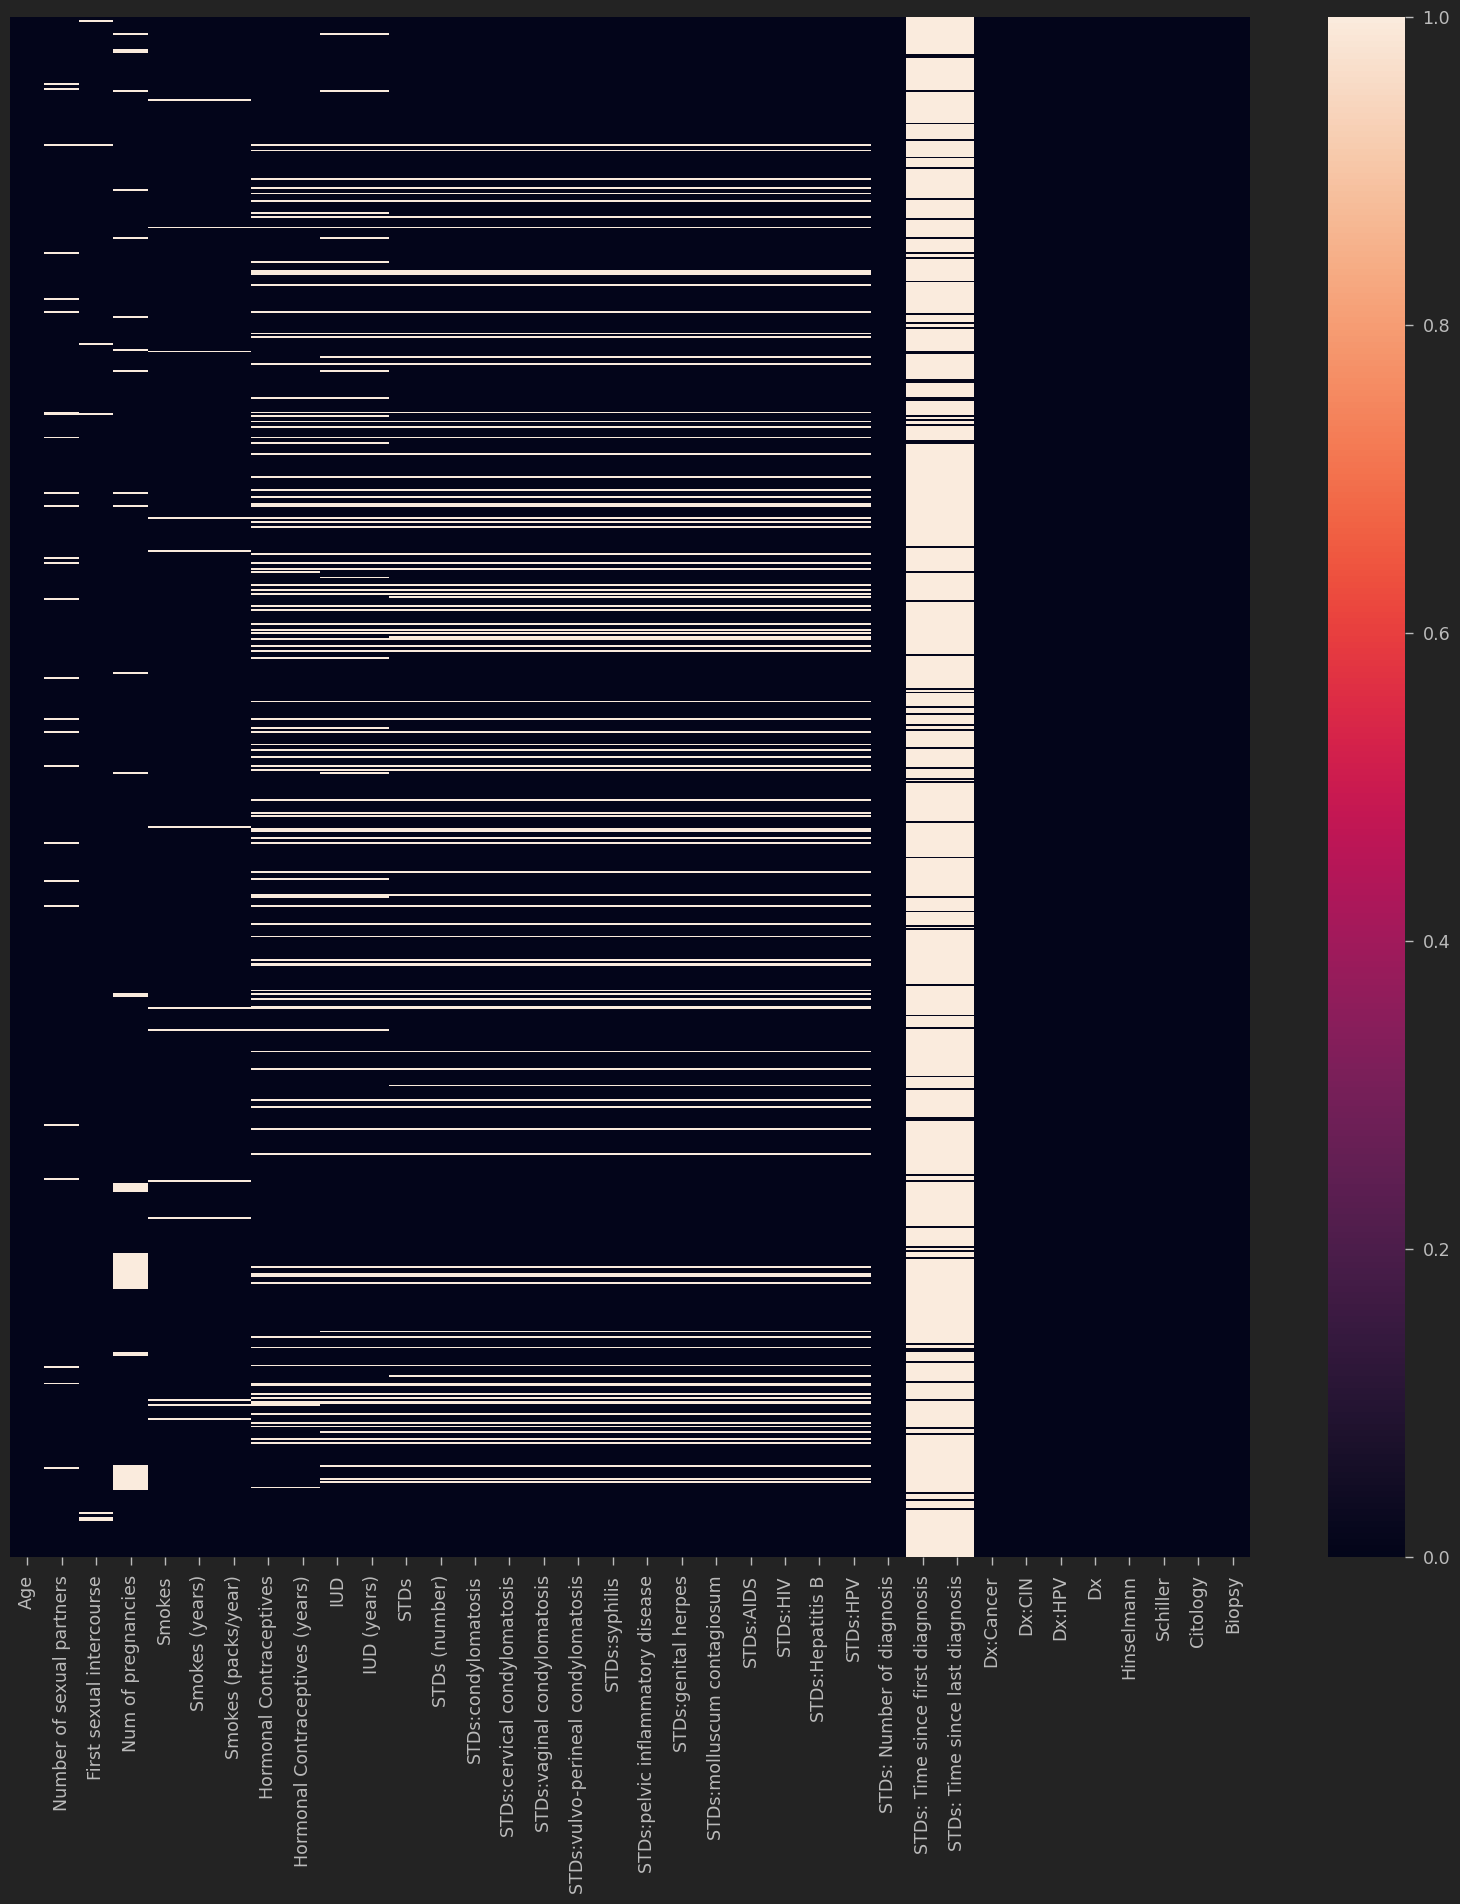

In [68]:
plt.figure(figsize=(20,20))
sns.heatmap(cancer_df.isnull(), yticklabels = False )

In [69]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           832 non-null    object
 2   First sexual intercourse            851 non-null    object
 3   Num of pregnancies                  802 non-null    object
 4   Smokes                              845 non-null    object
 5   Smokes (years)                      845 non-null    object
 6   Smokes (packs/year)                 845 non-null    object
 7   Hormonal Contraceptives             750 non-null    object
 8   Hormonal Contraceptives (years)     750 non-null    object
 9   IUD                                 741 non-null    object
 10  IUD (years)                         741 non-null    object
 11  STDs                                753 non-null    object

In [70]:
cancer_df = cancer_df.drop(columns = ['STDs: Time since first diagnosis','STDs: Time since last diagnosis'])

In [71]:
cancer_df = cancer_df.apply(pd.to_numeric)
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

In [72]:
cancer_df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,832.000000,851.000000,802.000000,845.000000,845.000000,845.000000,750.000000,750.000000,741.000000,...,753.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,0.112011,...,0.002656,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.667760,2.803355,1.447414,0.352876,4.089017,2.226610,0.479929,3.764254,0.315593,...,0.051503,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [73]:
cancer_df.mean()

Age                                   26.820513
Number of sexual partners              2.527644
First sexual intercourse              16.995300
Num of pregnancies                     2.275561
Smokes                                 0.145562
Smokes (years)                         1.219721
Smokes (packs/year)                    0.453144
Hormonal Contraceptives                0.641333
Hormonal Contraceptives (years)        2.256419
IUD                                    0.112011
IUD (years)                            0.514804
STDs                                   0.104914
STDs (number)                          0.176627
STDs:condylomatosis                    0.058433
STDs:cervical condylomatosis           0.000000
STDs:vaginal condylomatosis            0.005312
STDs:vulvo-perineal condylomatosis     0.057105
STDs:syphilis                          0.023904
STDs:pelvic inflammatory disease       0.001328
STDs:genital herpes                    0.001328
STDs:molluscum contagiosum             0

In [74]:
cancer_df = cancer_df.fillna(cancer_df.mean())
cancer_df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0000,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0000,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,16.9953,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0000,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0000,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
854,32,2.0,19.0000,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
855,25,2.0,17.0000,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,1,0
856,33,2.0,24.0000,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,0,0


<Axes: >

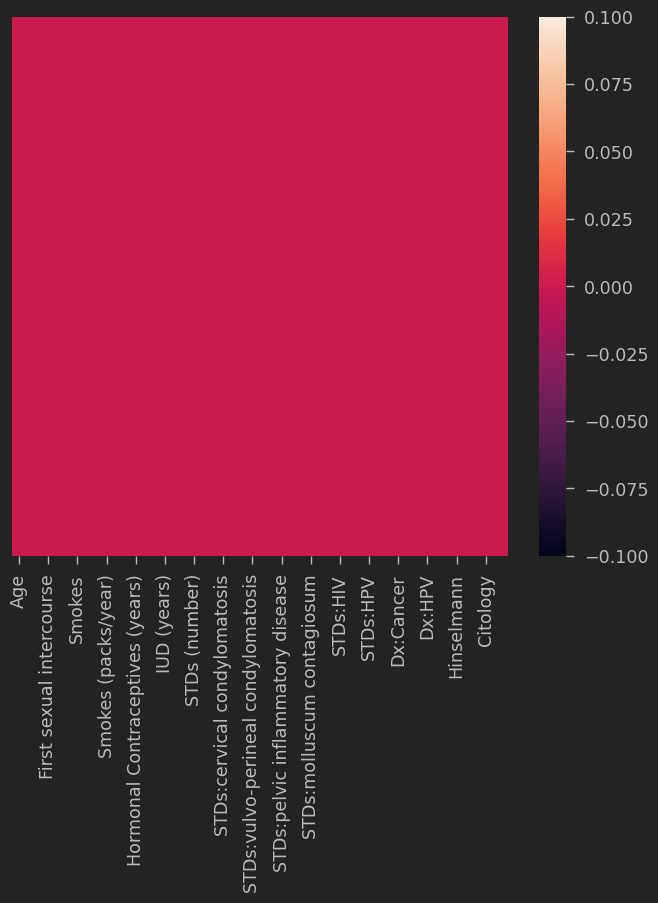

In [75]:
sns.heatmap(cancer_df.isnull(), yticklabels = False)

In [76]:
cancer_df['Age'].max()

84

In [77]:
cancer_df['Age'].min()


13

In [78]:
corr_matrix = cancer_df.corr()
corr_matrix

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
Age,1.000000,0.084896,0.369168,0.526137,0.055813,0.217349,0.131180,0.065624,0.277181,0.267662,...,0.038546,-0.001606,0.110340,0.061443,0.101722,0.092635,-0.003967,0.103283,-0.016862,0.055956
Number of sexual partners,0.084896,1.000000,-0.147937,0.076719,0.238078,0.177117,0.175153,0.006342,0.018552,0.030005,...,0.013871,0.051559,0.022309,0.015691,0.027264,0.022982,-0.039273,-0.008899,0.021839,-0.001429
First sexual intercourse,0.369168,-0.147937,1.000000,-0.058223,-0.123602,-0.058366,-0.056332,0.018344,0.008000,-0.020975,...,0.033112,-0.013327,0.067283,-0.032626,0.043966,0.035750,-0.016546,0.003493,-0.010971,0.007262
Num of pregnancies,0.526137,0.076719,-0.058223,1.000000,0.080768,0.174912,0.097044,0.142858,0.207839,0.198550,...,-0.028162,0.033514,0.035123,0.007344,0.046753,0.019025,0.038685,0.087687,-0.029656,0.043460
Smokes,0.055813,0.238078,-0.123602,0.080768,1.000000,0.723128,0.493361,-0.002165,0.044157,-0.051184,...,0.049171,0.095433,-0.011027,-0.042822,0.012210,-0.067614,0.034527,0.053613,-0.003913,0.029091
Smokes (years),0.217349,0.177117,-0.058366,0.174912,0.723128,1.000000,0.724116,-0.011002,0.048899,0.027562,...,0.050935,0.081676,0.054674,-0.030966,0.057214,-0.048894,0.071232,0.094640,-0.006750,0.061484
Smokes (packs/year),0.131180,0.175153,-0.056332,0.097044,0.493361,0.724116,1.000000,0.005880,0.040112,0.007891,...,-0.008410,0.032186,0.108476,-0.021127,0.110366,-0.033358,0.026662,0.017954,0.004613,0.024657
Hormonal Contraceptives,0.065624,0.006342,0.018344,0.142858,-0.002165,-0.011002,0.005880,1.000000,0.448574,0.033729,...,0.039040,-0.050660,0.026407,-0.003334,0.038038,-0.001723,0.033551,-0.004247,-0.011030,0.007711
Hormonal Contraceptives (years),0.277181,0.018552,0.008000,0.207839,0.044157,0.048899,0.040112,0.448574,1.000000,0.094953,...,0.052059,-0.037219,0.054627,0.003086,0.061394,-0.012865,0.038825,0.078707,0.074324,0.078995
IUD,0.267662,0.030005,-0.020975,0.198550,-0.051184,0.027562,0.007891,0.033729,0.094953,1.000000,...,-0.018574,0.029871,0.110541,0.051833,0.058154,0.138905,0.044059,0.084074,0.007348,0.051554


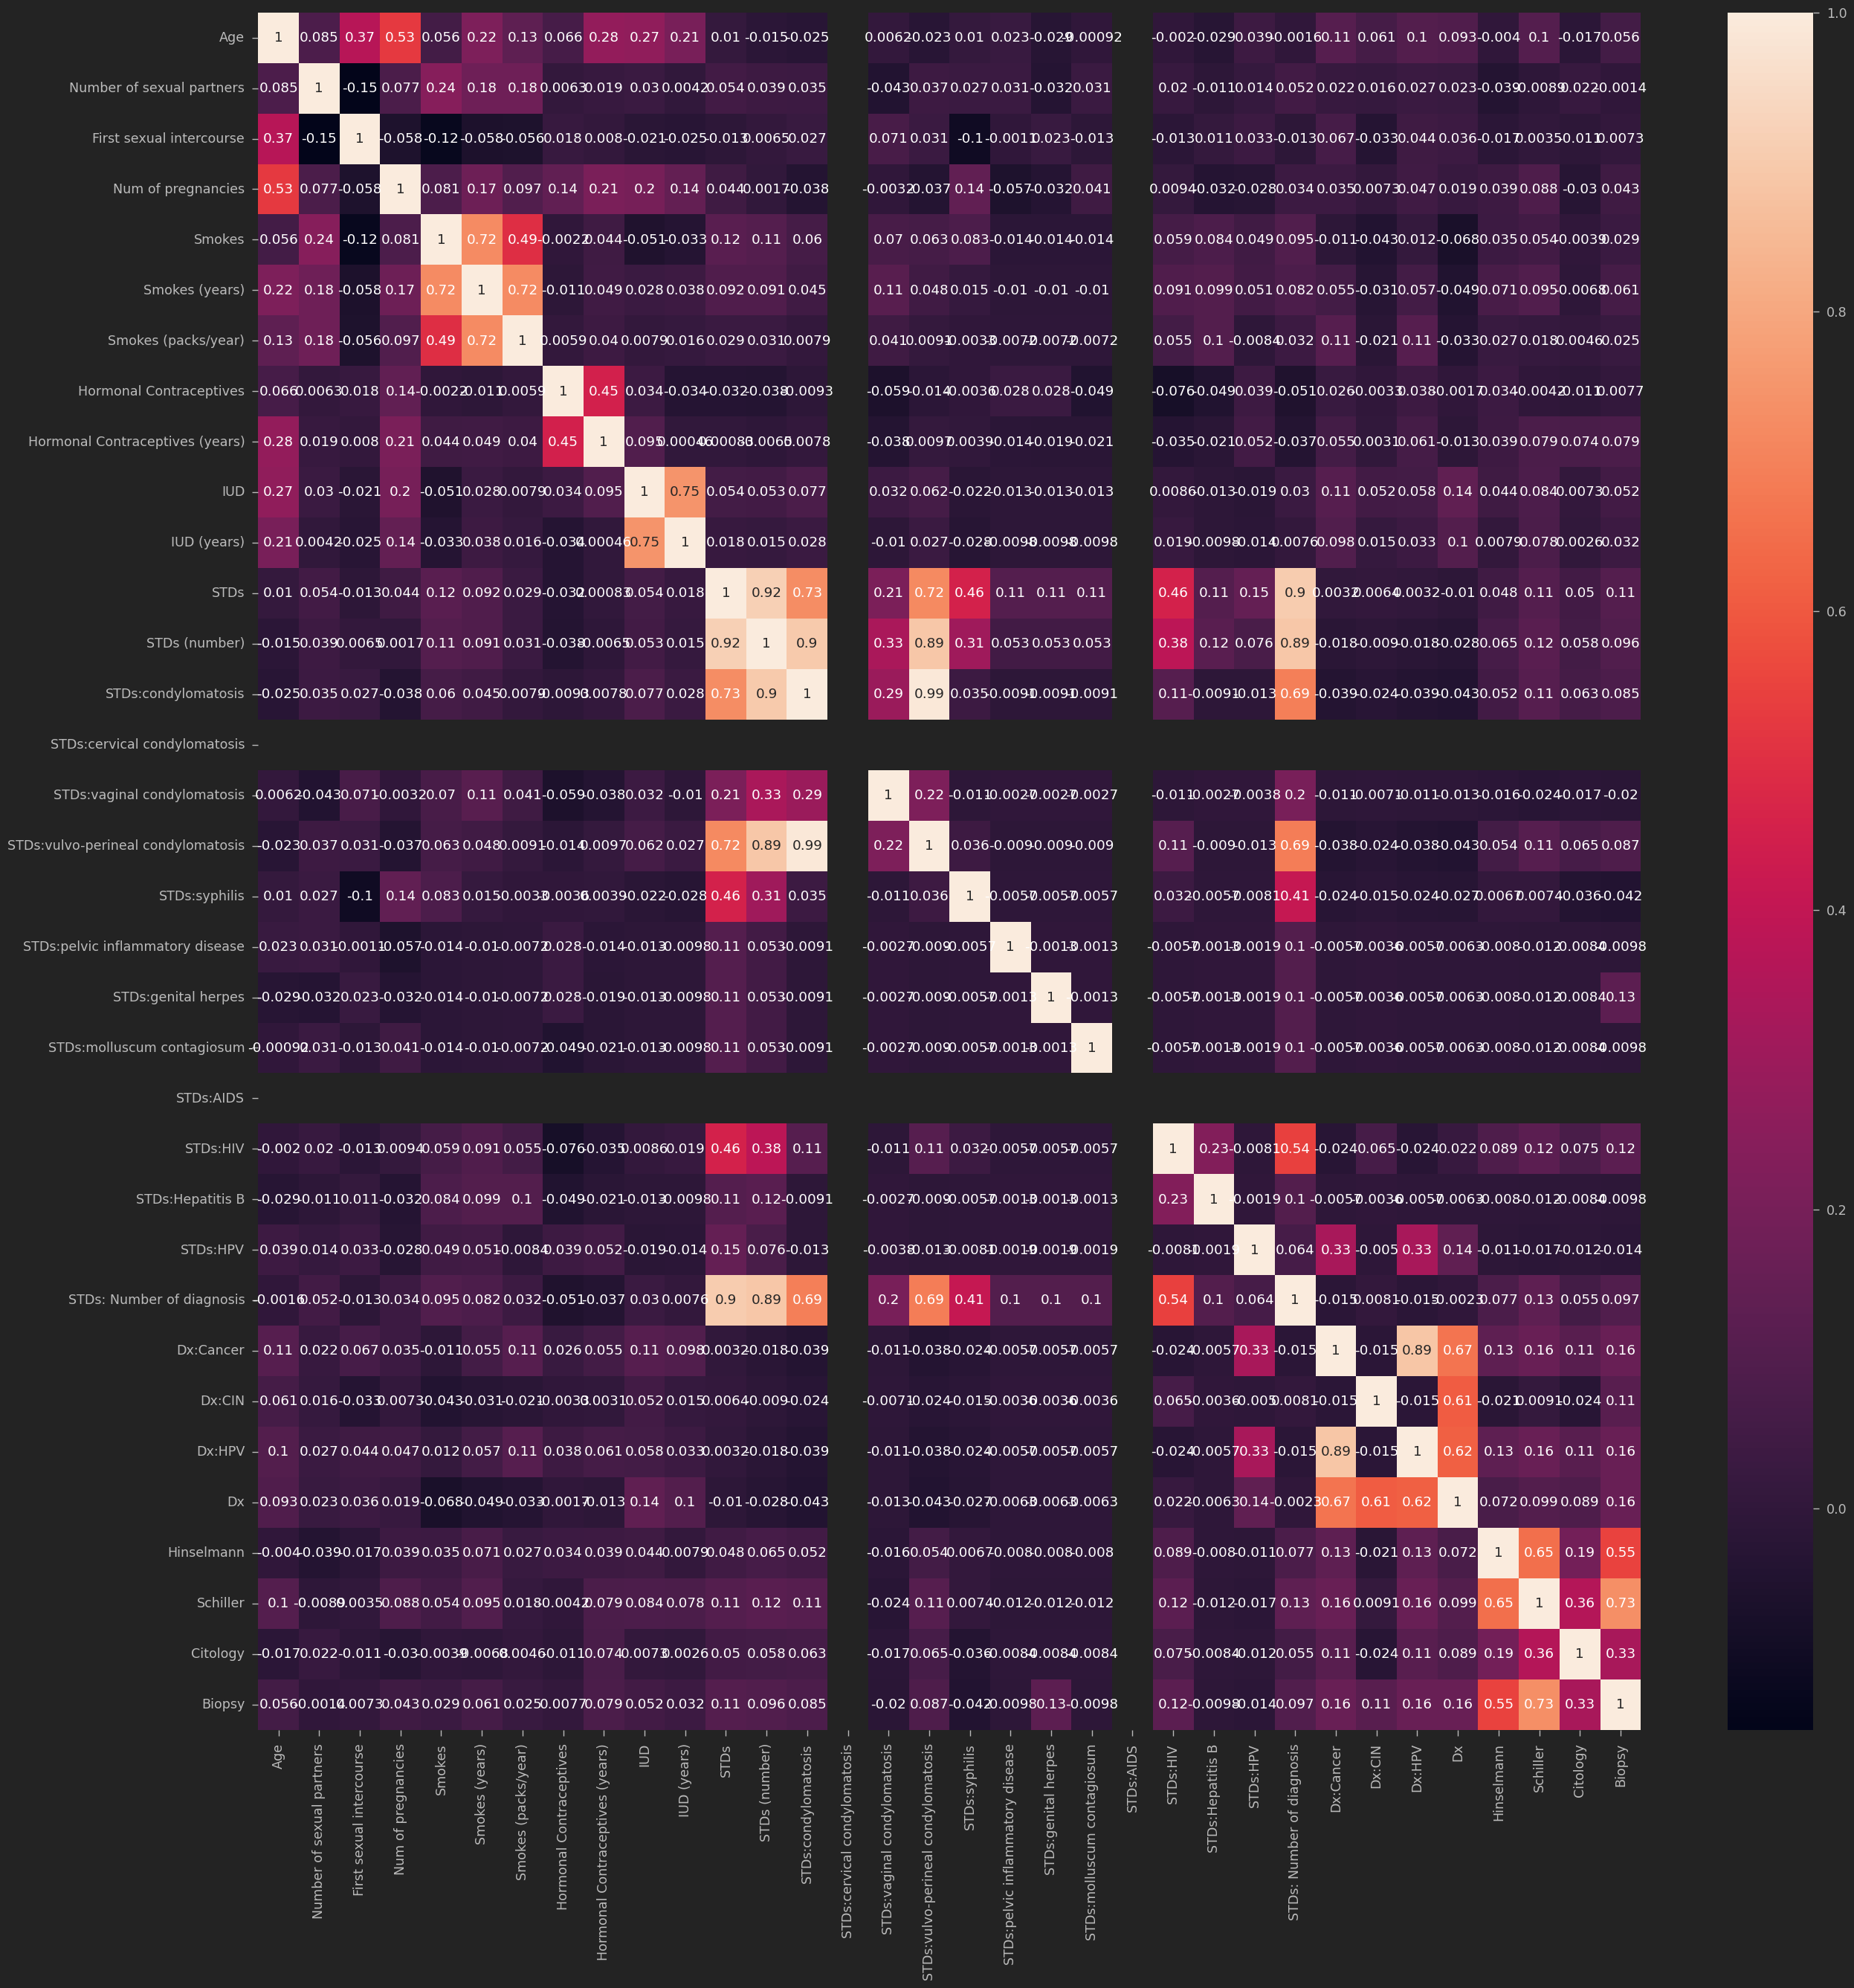

In [97]:
plt.figure(figsize =(30,30))
sns.heatmap(corr_matrix, annot = True)
plt.show()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Number of sexual partners'}>,
        <Axes: title={'center': 'First sexual intercourse'}>,
        <Axes: title={'center': 'Num of pregnancies'}>,
        <Axes: title={'center': 'Smokes'}>,
        <Axes: title={'center': 'Smokes (years)'}>],
       [<Axes: title={'center': 'Smokes (packs/year)'}>,
        <Axes: title={'center': 'Hormonal Contraceptives'}>,
        <Axes: title={'center': 'Hormonal Contraceptives (years)'}>,
        <Axes: title={'center': 'IUD'}>,
        <Axes: title={'center': 'IUD (years)'}>,
        <Axes: title={'center': 'STDs'}>],
       [<Axes: title={'center': 'STDs (number)'}>,
        <Axes: title={'center': 'STDs:condylomatosis'}>,
        <Axes: title={'center': 'STDs:cervical condylomatosis'}>,
        <Axes: title={'center': 'STDs:vaginal condylomatosis'}>,
        <Axes: title={'center': 'STDs:vulvo-perineal condylomatosis'}>,
        <Axes: title={'center': 'STDs:syphilis'}>]

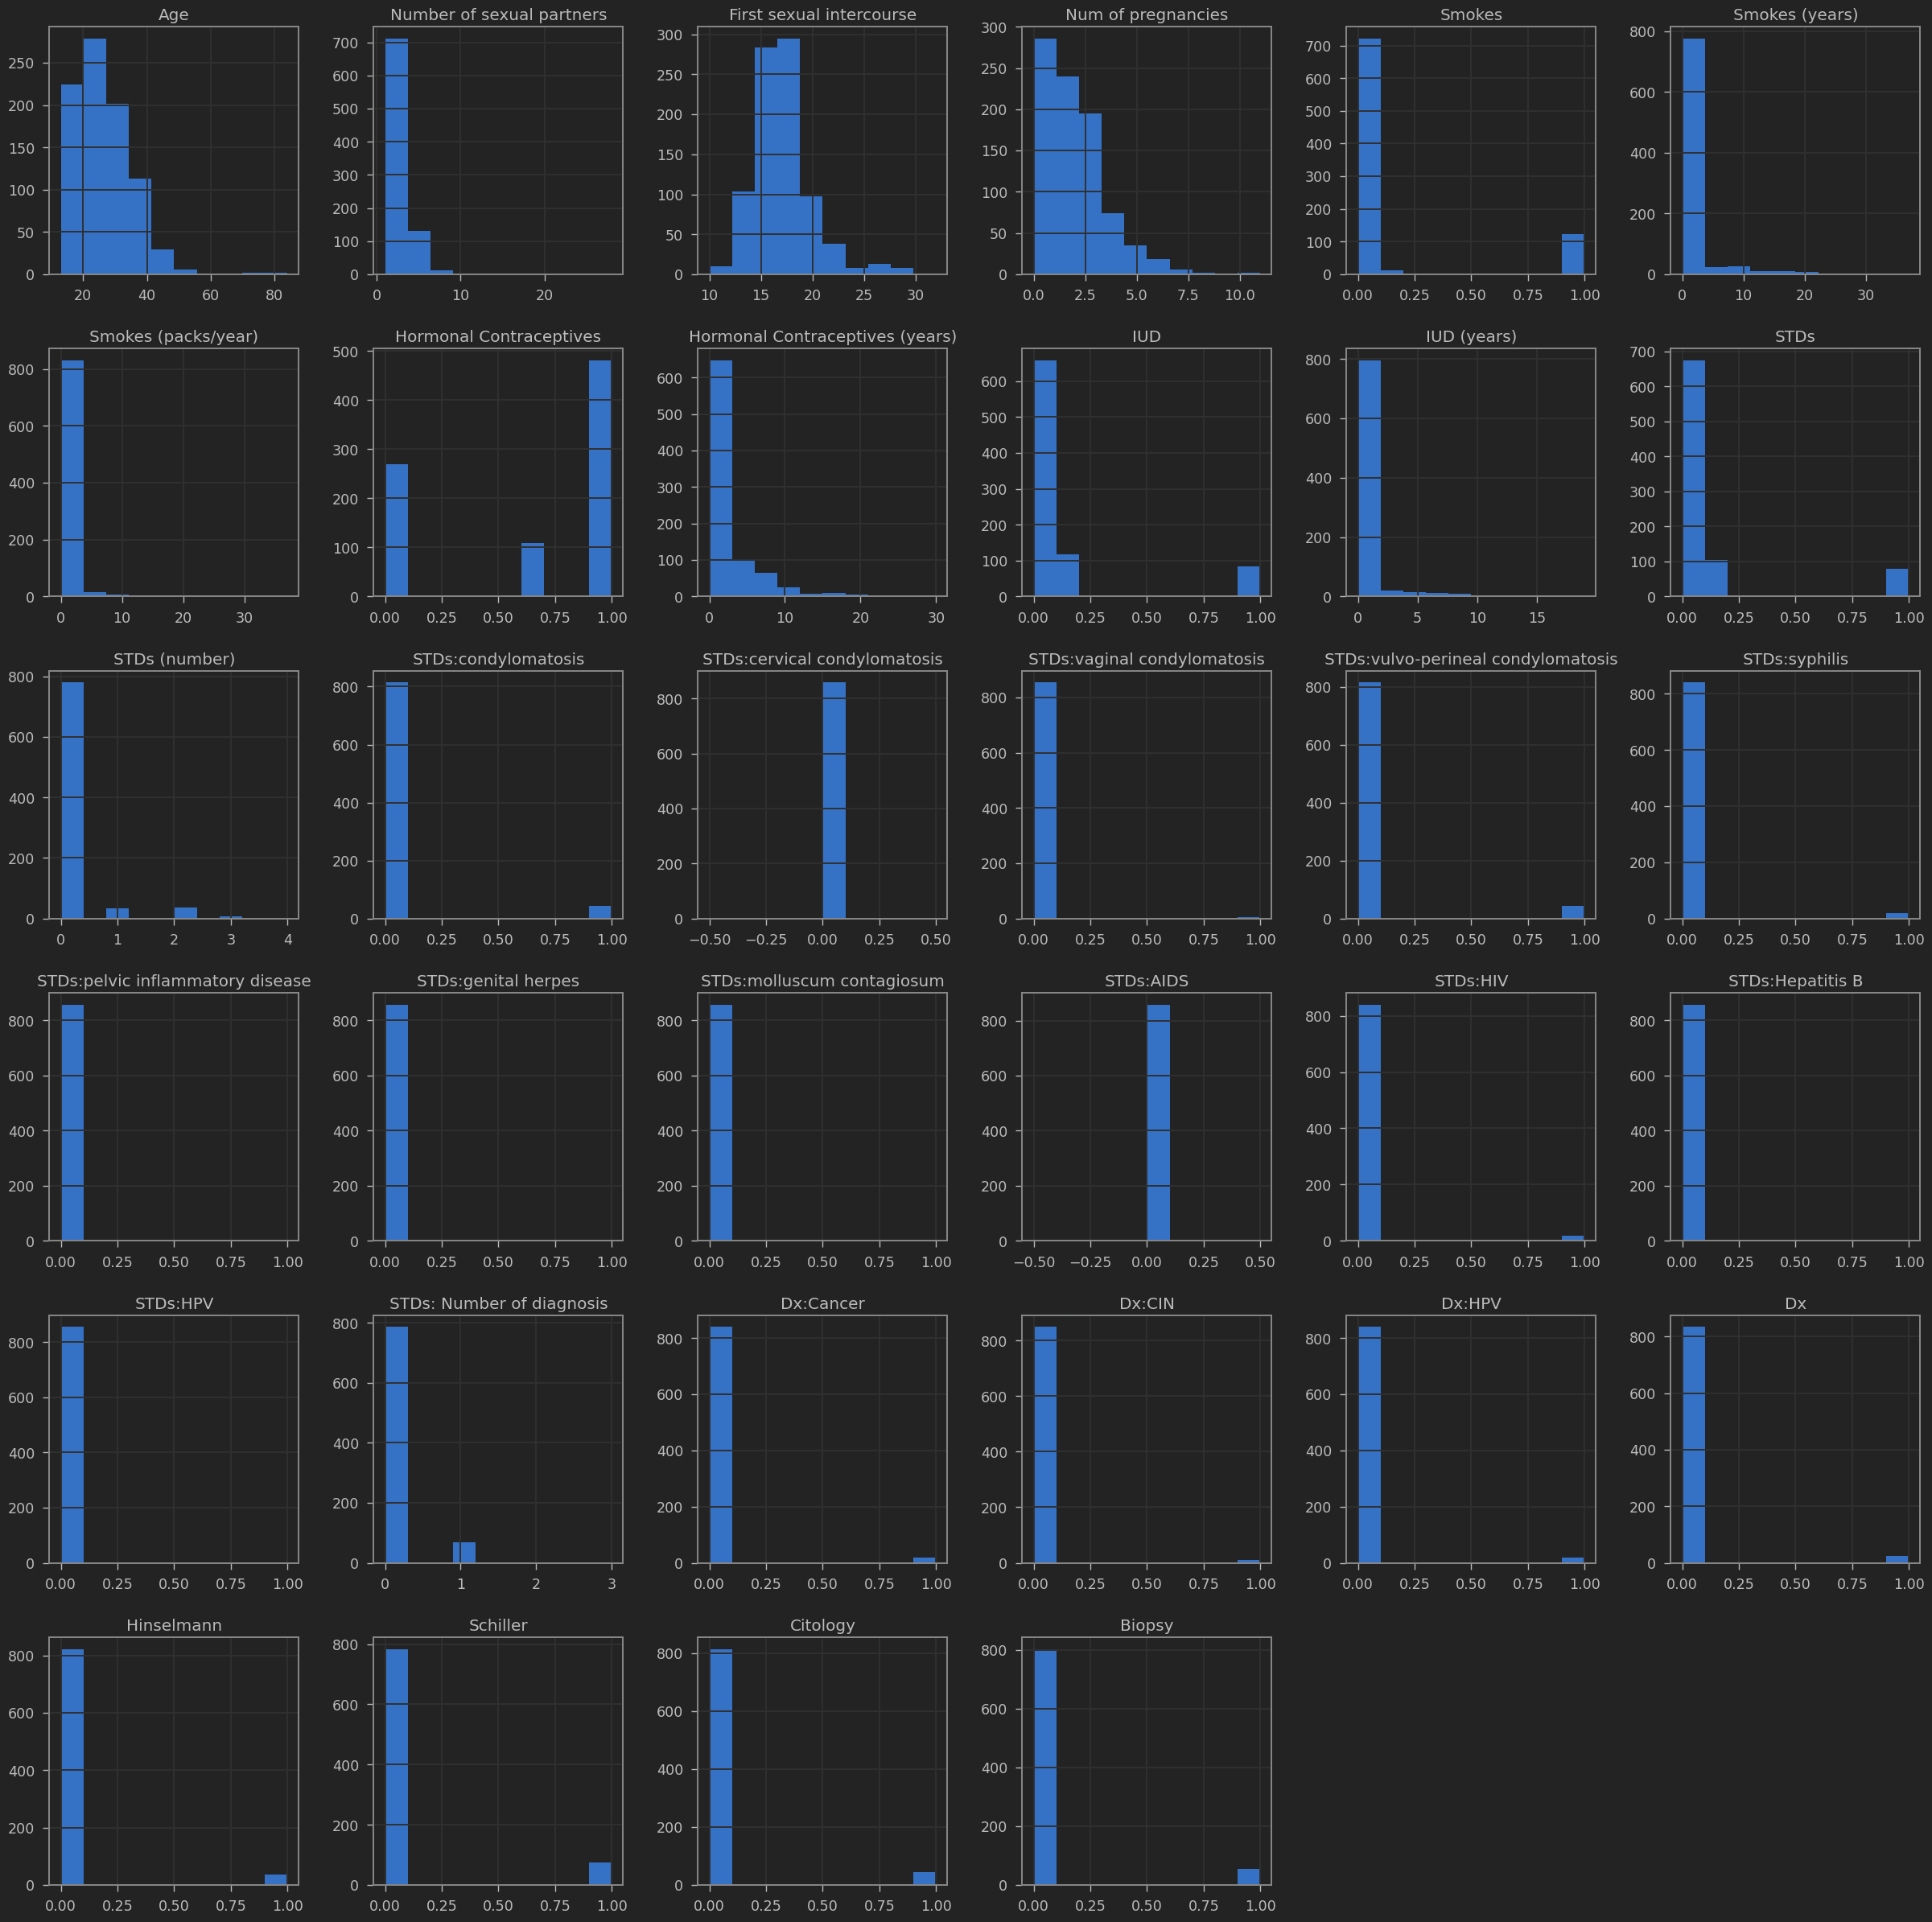

In [80]:
cancer_df.hist(bins=10, figsize=(30,30), color='b')

In [81]:
target_df = cancer_df['Biopsy']
input_df = cancer_df.drop(columns = ['Biopsy'])
target_df.shape

(858,)

In [82]:
input_df.shape

(858, 33)

In [83]:
X = np.array(input_df).astype('float32')
y = np.array(target_df).astype('float32')

In [84]:
y.shape

(858,)

In [85]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [86]:
X

array([[-1.0385634e+00,  8.9706147e-01, -7.1509570e-01, ...,
        -2.0622157e-01, -3.0722591e-01, -2.3249528e-01],
       [-1.3917956e+00, -9.3074709e-01, -1.0734857e+00, ...,
        -2.0622157e-01, -3.0722591e-01, -2.3249528e-01],
       [ 8.4534228e-01, -9.3074709e-01,  2.2945171e-07, ...,
        -2.0622157e-01, -3.0722591e-01, -2.3249528e-01],
       ...,
       [-2.1435463e-01, -3.2147753e-01,  1.6845580e-03, ...,
        -2.0622157e-01, -3.0722591e-01,  4.3011627e+00],
       [ 7.2759819e-01, -3.2147753e-01,  2.5104153e+00, ...,
        -2.0622157e-01, -3.0722591e-01, -2.3249528e-01],
       [ 2.5662178e-01, -3.2147753e-01,  1.0768549e+00, ...,
        -2.0622157e-01, -3.0722591e-01, -2.3249528e-01]], dtype=float32)

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [88]:
X_train.shape


(643, 33)

In [89]:
!pip install xgboost

In [90]:
import xgboost as xgb

model = xgb.XGBClassifier(learning_rate=0.1, max_depth=50, n_estimators=100)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=50, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [91]:
result_train = model.score(X_train, y_train)
result_train

0.9984447900466563

In [92]:
result_test = model.score(X_test, y_test)
result_test

0.9345794392523364

In [93]:
y_predict = model.predict(X_test)

In [94]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96        97
         1.0       0.71      0.50      0.59        10

    accuracy                           0.93       107
   macro avg       0.83      0.74      0.78       107
weighted avg       0.93      0.93      0.93       107



<Axes: >

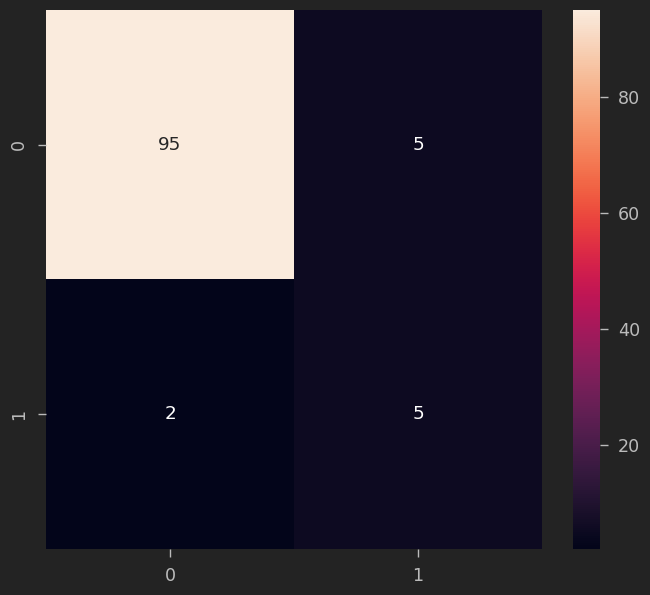

In [95]:
cm = confusion_matrix(y_predict, y_test)
sns.heatmap(cm, annot = True)